In [1]:
import warnings
warnings.filterwarnings("ignore")

conda create -n myenv python=3.11.14

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📝 Data Dictionary for Fraud Detection Dataset

This dataset contains a mix of numeric, categorical, and binary features related to a credit application, along with the binary target variable, `fraud_bool`.

---

### 1. Applicant & Account Information

| Feature Name | Type | Description | Range / Notes |
| :--- | :--- | :--- | :--- |
| **income** | Numeric | Annual income of the applicant (in decile form). | [0.1, 0.9] |
| **name_email_similarity** | Numeric | Similarity between email and applicant’s name. Higher = higher similarity. | [0, 1] |
| **customer_age** | Numeric | Applicant’s age in years, rounded to the decade. | [10, 90] years |
| **employment_status** | Categorical | Employment status of the applicant. | 7 possible (annonymized) values. |
| **housing_status** | Categorical | Current residential status for applicant. | 7 possible (annonymized) values. |
| **has_other_cards** | Binary | If applicant has other cards from the same banking company. | |
| **bank_months_count** | Numeric | How old is previous account (if held) in months. | [−1, 32] months. **-1 is a missing value.** |
| **credit_risk_score** | Numeric | Internal score of application risk. | [−191, 389] |
| **proposed_credit_limit** | Numeric | Applicant’s proposed credit limit. | [200, 2000] |

---

### 2. Address & Time-Based Features

| Feature Name | Type | Description | Range / Notes |
| :--- | :--- | :--- | :--- |
| **prev_address_months_count** | Numeric | Months in previous registered address. | [−1, 380] months. **-1 is a missing value.** |
| **current_address_months_count** | Numeric | Months in currently registered address. | [−1, 429] months. **-1 is a missing value.** |
| **days_since_request** | Numeric | Number of days passed since application was done. | [0, 79] days |
| **month** | Numeric | Month where the application was made. | [0, 7] |

---

### 3. Application Device & Session Features

| Feature Name | Type | Description | Range / Notes |
| :--- | :--- | :--- | :--- |
| **intended_balcon_amount** | Numeric | Initial transferred amount for application. | [−16, 114]. **Negatives are missing values.** |
| **payment_type** | Categorical | Credit payment plan type. | 5 possible (annonymized) values. |
| **email_is_free** | Binary | Domain of application email (free or paid). | |
| **foreign_request** | Binary | If origin country of request is different from bank’s country. | |
| **source** | Categorical | Online source of application. | **INTERNET** (browser) or **TELEAPP** (app). |
| **session_length_in_minutes** | Numeric | Length of user session in banking website. | [−1, 107] minutes. **-1 is a missing value.** |
| **device_os** | Categorical | Operative system of device that made request. | Windows, macOS, Linux, X11, or other. |
| **keep_alive_session** | Binary | User option on session logout. | |
| **device_distinct_emails** | Numeric | Distinct emails from the used device in last 8 weeks. | [−1, 2] emails. **-1 is a missing value.** |
| **device_fraud_count** | Numeric | Number of fraudulent applications with used device. | [0, 1] |

---

### 4. Velocity and Count Features (Aggregates)

| Feature Name | Type | Description | Range / Notes |
| :--- | :--- | :--- | :--- |
| **zip_count_4w** | Numeric | Applications within same zip code in last 4 weeks. | [1, 6830] |
| **velocity_6h** | Numeric | Average applications per hour in the last 6 hours. | [−175, 16818]. **Note the negative lower bound.** |
| **velocity_24h** | Numeric | Average applications per hour in the last 24 hours. | [1297, 9586] |
| **velocity_4w** | Numeric | Average applications per hour in the last 4 weeks. | [2825, 7020] |
| **bank_branch_count_8w** | Numeric | Total applications in the selected bank branch in last 8 weeks. | [0, 2404] |
| **date_of_birth_distinct_emails_4w** | Numeric | Number of emails for applicants with same DOB in last 4 weeks. | [0, 39] |

---

### 5. Phone & Target Variables

| Feature Name | Type | Description | Range / Notes |
| :--- | :--- | :--- | :--- |
| **phone_home_valid** | Binary | Validity of provided home phone. | |
| **phone_mobile_valid** | Binary | Validity of provided mobile phone. | |
| **fraud_bool** | Binary | **TARGET VARIABLE:** If the application is fraudulent or not. | 0 or 1 |

In [3]:
og_df = pd.read_csv(r"C:\Users\Red\Desktop\mlops\bank_fraud_realtime\input\Base.csv")

og_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [4]:
og_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [5]:
fraud_df = og_df[og_df['fraud_bool'] == 1]
fraud_df['month'].value_counts()

month
0    1500
4    1452
6    1450
7    1428
5    1411
3    1392
2    1198
1    1198
Name: count, dtype: int64

In [6]:
# df = og_df[og_df['month']<=5]
df = og_df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [8]:
df.isnull().sum().sort_values(ascending=False)

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [9]:
df[['fraud_bool']].value_counts(normalize = True)*100.0

fraud_bool
0             98.8971
1              1.1029
Name: proportion, dtype: float64

In [10]:
df['fraud_bool'].min()

np.int64(0)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [12]:
import numpy as np

cols_with_neg1 = [
    'prev_address_months_count',
    'current_address_months_count',
    'bank_months_count',
    'intended_balcon_amount',
    'credit_risk_score',
    'session_length_in_minutes',
    'device_distinct_emails_8w'
]

for col in cols_with_neg1:
    df[col] = df[col].replace(-1, np.nan)
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)

(df.isna().sum()/len(df)*100).sort_values(ascending=False).head(10)


intended_balcon_amount          74.2523
prev_address_months_count       71.2920
bank_months_count               25.3635
credit_risk_score                1.4445
current_address_months_count     0.4254
session_length_in_minutes        0.2015
device_distinct_emails_8w        0.0359
fraud_bool                       0.0000
payment_type                     0.0000
zip_count_4w                     0.0000
dtype: float64

Holyy smoking pot 70+ values missing.uselss dustbin. LEts check them out

In [13]:
cols_with_missing = [
    'intended_balcon_amount',
    'prev_address_months_count',
    'bank_months_count',
    'credit_risk_score',
    'current_address_months_count',
    'session_length_in_minutes',
    'device_distinct_emails_8w'
]

for col in cols_with_missing:
    missing_df = df[df[col].isna()]
    total_missing = len(missing_df)
    fraud_missing = missing_df['fraud_bool'].sum()
    nonfraud_missing = total_missing - fraud_missing
    fraud_ratio = round(100 * fraud_missing / total_missing, 3) if total_missing > 0 else 0
    
    print(f"{col:30} → Missing: {total_missing:8} | Fraud: {fraud_missing:6} | Non-Fraud: {nonfraud_missing:8} | Fraud %: {fraud_ratio}")


intended_balcon_amount         → Missing:   742523 | Fraud:   9747 | Non-Fraud:   732776 | Fraud %: 1.313
prev_address_months_count      → Missing:   712920 | Fraud:  10134 | Non-Fraud:   702786 | Fraud %: 1.421
bank_months_count              → Missing:   253635 | Fraud:   4140 | Non-Fraud:   249495 | Fraud %: 1.632
credit_risk_score              → Missing:    14445 | Fraud:     56 | Non-Fraud:    14389 | Fraud %: 0.388
current_address_months_count   → Missing:     4254 | Fraud:     14 | Non-Fraud:     4240 | Fraud %: 0.329
session_length_in_minutes      → Missing:     2015 | Fraud:     18 | Non-Fraud:     1997 | Fraud %: 0.893
device_distinct_emails_8w      → Missing:      359 | Fraud:      4 | Non-Fraud:      355 | Fraud %: 1.114


lets remove top 3 most missing features 

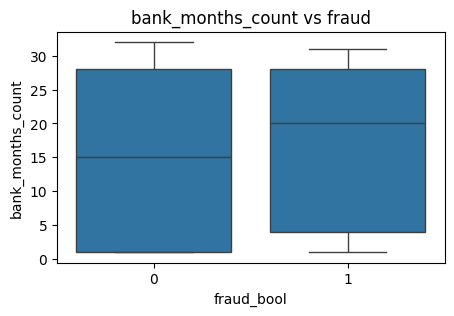

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(x='fraud_bool',y='bank_months_count',data=df,showfliers = False)
plt.title("bank_months_count vs fraud")
plt.show()

In [15]:
cols_to_drop = [
    'intended_balcon_amount',
    'prev_address_months_count',
    'bank_months_count'
]

df_clean = df.drop(columns=cols_to_drop)
print("Remaining columns:", len(df_clean.columns))


Remaining columns: 29


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   current_address_months_count      995746 non-null   float64
 4   customer_age                      1000000 non-null  int64  
 5   days_since_request                1000000 non-null  float64
 6   payment_type                      1000000 non-null  object 
 7   zip_count_4w                      1000000 non-null  int64  
 8   velocity_6h                       1000000 non-null  float64
 9   velocity_24h                      1000000 non-null  float64
 10  velocity_4w                       1000000 non-null  float64
 11  bank_branch_count_8w              1000

In [17]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print("Numeric columns:", len(numeric_cols))
print(numeric_cols.tolist())
print("\nCategorical columns:", len(categorical_cols))
print(categorical_cols.tolist())


Numeric columns: 24
['fraud_bool', 'income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']

Categorical columns: 5
['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [18]:
df_clean['email_is_free'].unique()

array([1, 0])

In [19]:
num = ["income","customer_age",'name_email_similarity', 'current_address_months_count', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'proposed_credit_limit']
cat = ['email_is_free', 'phone_home_valid','phone_mobile_valid', 'has_other_cards','foreign_request','keep_alive_session','payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [20]:
df_clean[num+cat].describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000000.0,0.562696,0.290343,0.100000,0.300000,0.600000,0.800000,0.900000
customer_age,1000000.0,33.689080,12.025799,10.000000,20.000000,30.000000,40.000000,90.000000
name_email_similarity,1000000.0,0.493694,0.289125,0.000001,0.225216,0.492153,0.755567,0.999999
current_address_months_count,995746.0,86.962058,88.409289,0.000000,20.000000,53.000000,130.000000,428.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-170.603072,3436.365848,5319.769349,7680.717827,16715.565404
velocity_24h,1000000.0,4769.781965,1479.212612,1300.307314,3593.179135,4749.921161,5752.574191,9506.896596
velocity_4w,1000000.0,4856.324016,919.843934,2825.748405,4268.368423,4913.436941,5488.083356,6994.764201
date_of_birth_distinct_emails_4w,1000000.0,9.503544,5.033792,0.000000,6.000000,9.000000,13.000000,39.000000
credit_risk_score,985555.0,133.470998,66.969915,0.000000,85.000000,124.000000,179.000000,389.000000
proposed_credit_limit,1000000.0,515.851010,487.559902,190.000000,200.000000,200.000000,500.000000,2100.000000


In [21]:
df_clean['customer_age'].unique()

array([40, 20, 30, 50, 60, 90, 80, 70, 10])

In [22]:
df_clean['income'].unique()

array([0.3, 0.8, 0.6, 0.9, 0.2, 0.1, 0.5, 0.7, 0.4])

In [23]:
cat = cat+['income','customer_age']
df_clean[cat]

,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,payment_type,employment_status,housing_status,source,device_os,income,customer_age
0,1,0,1,0,0,1,AA,CB,BC,INTERNET,linux,0.3,40
1,1,1,1,0,0,1,AD,CA,BC,INTERNET,other,0.8,20
2,1,0,1,0,0,0,AB,CA,BC,INTERNET,windows,0.8,40
3,1,0,1,0,0,1,AB,CA,BC,INTERNET,linux,0.6,30
4,0,1,1,0,0,0,AA,CA,BC,INTERNET,other,0.9,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,1,1,0,0,0,AB,CA,BB,INTERNET,other,0.8,30
999996,0,1,1,1,0,0,AC,CA,BA,INTERNET,macintosh,0.9,30
999997,1,0,1,0,0,0,AA,CA,BE,INTERNET,other,0.8,10
999998,0,0,1,0,0,1,AB,CA,BD,INTERNET,linux,0.9,30


In [24]:
# Remove 'income'
num.remove('income')

# Remove 'customer_age'
num.remove('customer_age')
num

['name_email_similarity',
 'current_address_months_count',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'proposed_credit_limit']

In [25]:
df_clean[num+cat].isnull().sum().sort_values(ascending=False)

credit_risk_score                   14445
current_address_months_count         4254
name_email_similarity                   0
velocity_24h                            0
velocity_6h                             0
velocity_4w                             0
date_of_birth_distinct_emails_4w        0
proposed_credit_limit                   0
email_is_free                           0
phone_home_valid                        0
phone_mobile_valid                      0
has_other_cards                         0
foreign_request                         0
keep_alive_session                      0
payment_type                            0
employment_status                       0
housing_status                          0
source                                  0
device_os                               0
income                                  0
customer_age                            0
dtype: int64

Descriptive Statistics:
       credit_risk_score  current_address_months_count
count      985555.000000                 995746.000000
mean          133.470998                     86.962058
std            66.969915                     88.409289
min             0.000000                      0.000000
25%            85.000000                     20.000000
50%           124.000000                     53.000000
75%           179.000000                    130.000000
max           389.000000                    428.000000


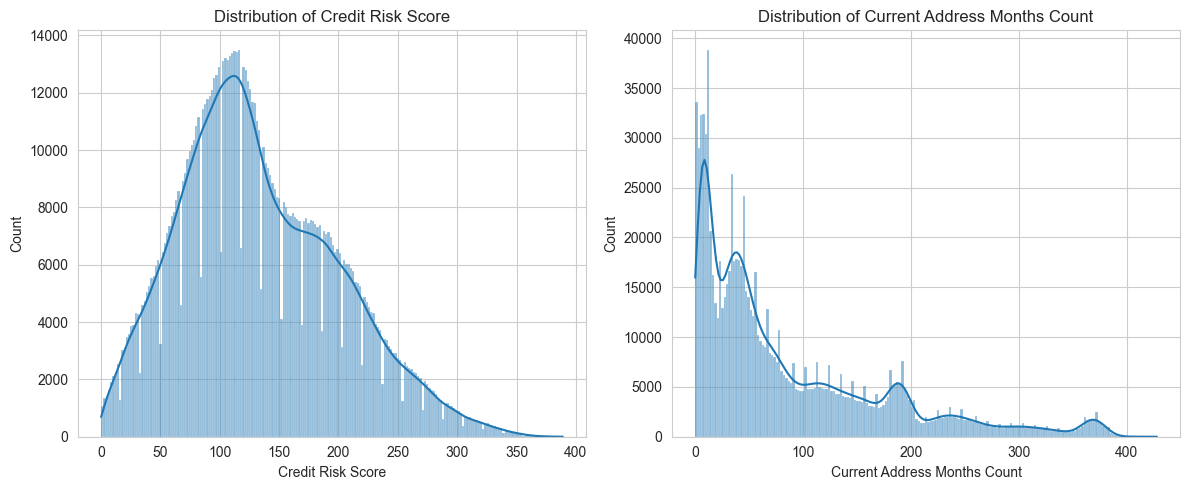

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
columns_to_check = ['credit_risk_score', 'current_address_months_count']

# Set up the plotting style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# --- Plot Histograms ---
plt.subplot(1, 2, 1)
sns.histplot(df_clean['credit_risk_score'], kde=True)
plt.title('Distribution of Credit Risk Score')
plt.xlabel('Credit Risk Score')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['current_address_months_count'], kde=True)
plt.title('Distribution of Current Address Months Count')
plt.xlabel('Current Address Months Count')

plt.tight_layout()



# --- Display Descriptive Statistics ---
print("Descriptive Statistics:")
print(df[columns_to_check].describe())

In [27]:
# Median Imputation
df_clean['credit_risk_score'].fillna(df_clean['credit_risk_score'].median(), inplace=True)
df_clean['current_address_months_count'].fillna(df_clean['current_address_months_count'].median(), inplace=True)


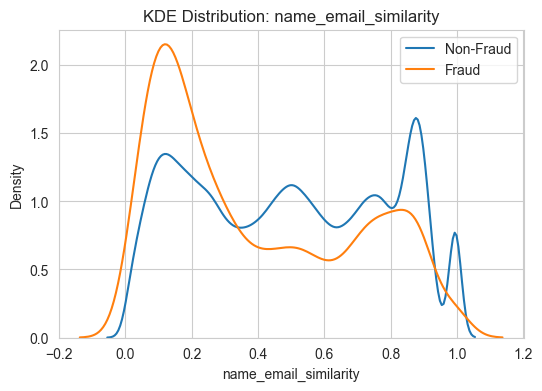

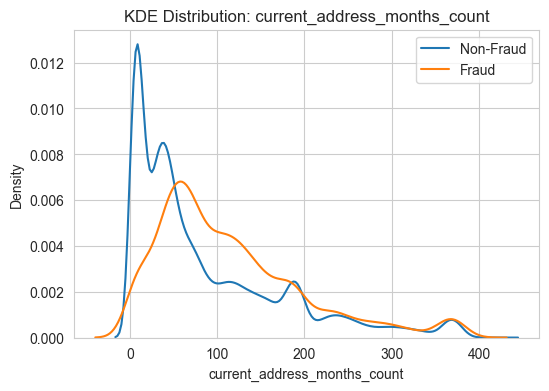

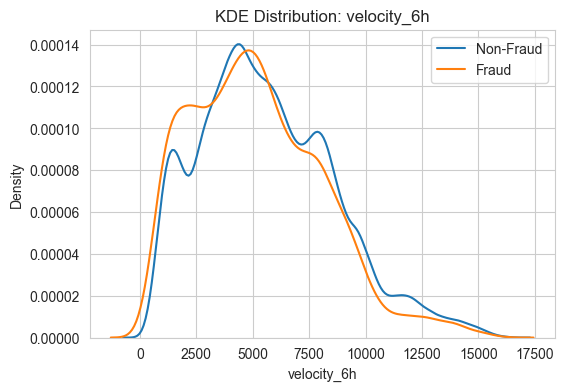

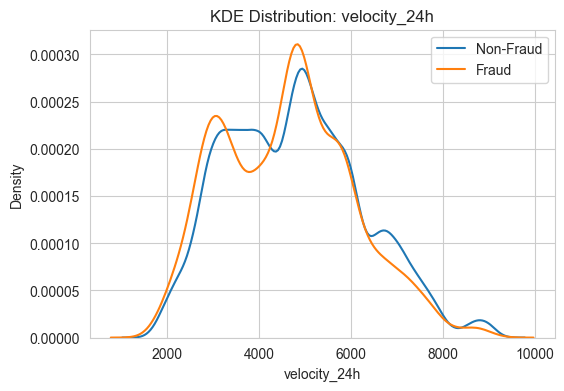

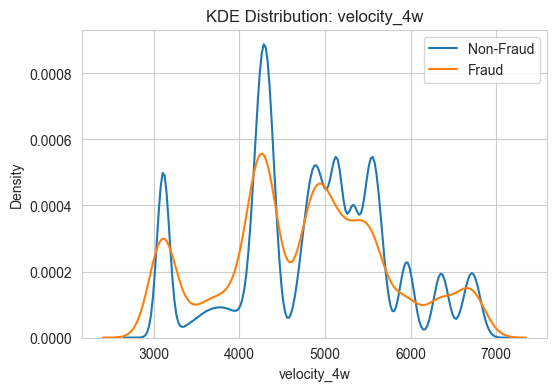

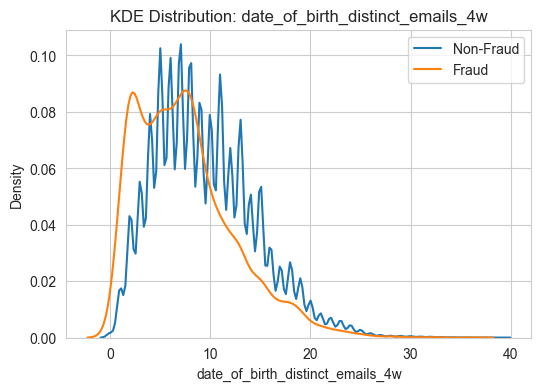

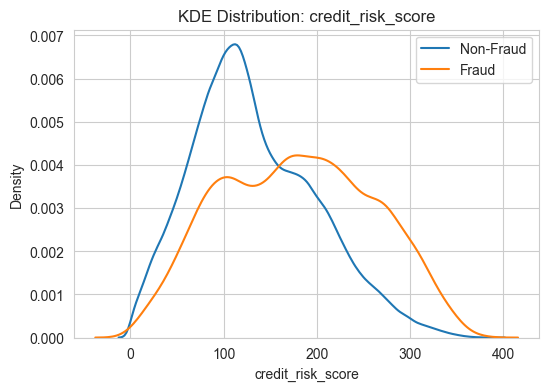

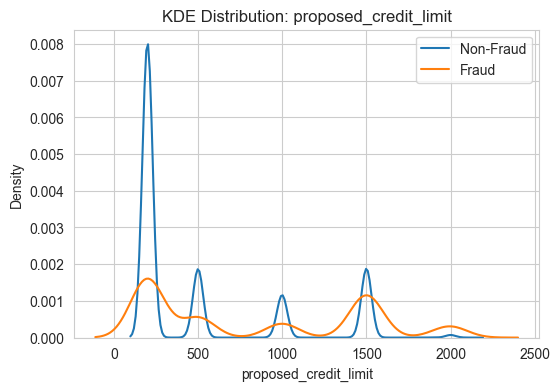

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['fraud_bool']==0][col], label='Non-Fraud')
    sns.kdeplot(df[df['fraud_bool']==1][col], label='Fraud')
    plt.title(f"KDE Distribution: {col}")
    plt.legend()
    plt.show()


## 📊 KDE Distribution Analysis: Fraud vs. Non-Fraud Features

These Kernel Density Estimate (KDE) plots visually compare the feature distributions between **Non-Fraud** (Blue) and **Fraud** (Orange) classes. Features with **clear separation** between the two curves are the most useful for predictive modeling.

---

### 1. Summary of Distribution Analysis

| Feature | Separation/Distinction | Conclusion for Modeling |
| :--- | :--- | :--- |
| **credit\_risk\_score** | **High** | **Most useful.** Fraud distribution is notably shifted to the right (higher scores). |
| **proposed\_credit\_limit** | **High** | **Highly useful.** Fraudulent transactions are concentrated at lower limits where the Non-Fraud peak is much lower. |
| **current\_address\_months\_count** | **Moderate** | **Useful.** Fraud distribution is shifted toward the left (fewer months), suggesting fraudsters are less established. |
| **date\_of\_birth\_distinct\_emails\_4w** | **Moderate** | **Useful.** Distributions are different in shape and density at low counts. |
| **velocity\_24h** | **Low** | **Less useful.** The two distributions are very similar and heavily overlap. |
| **velocity\_6h** | **Low** | **Less useful.** The two distributions are nearly identical and highly overlapped. |
| **velocity\_4w** | **Low** | **Less useful.** The two distributions are very close and heavily overlapped. |

---

### 2. Detailed Feature Analysis

#### Features with **High** Separation (Most Useful)

* **credit\_risk\_score**
    * **Observation:** The **Non-Fraud** peak is sharp and low (around 100). The **Fraud** distribution is significantly **shifted to the right**, peaking higher (around 180-200), indicating a strong association between **higher credit risk scores** and fraudulent transactions.
* **proposed\_credit\_limit**
    * **Observation:** The **Non-Fraud** curve shows sharp, distinct peaks. The **Fraud** curve has a relatively higher density at very **low limits** (e.g., 0 to 250), suggesting fraudsters often apply for accounts with lower proposed credit limits.A proposed credit limit that falls outside the common, standard tiers, especially one at the lowest end of the range, is a strong signal of potentially fraudulent activity.

#### Features with **Moderate** Separation (Useful)

* **current\_address\_months\_count**
    * **Observation:** The **Non-Fraud** distribution has a very tall peak near 0-25 months. The **Fraud** distribution has a **lower and wider peak** (near 25-50 months) but is generally concentrated in the lower ranges (0-100 months).
    * **Implication:** Fraudulent accounts are concentrated among users who have been at their current address for a **shorter period of time**.
* **date\_of\_birth\_distinct\_emails\_4w**
    * **Observation:** The **Non-Fraud** curve is highly jagged/peaked, while the **Fraud** curve is smoother and tends to have a slightly higher density at very **low counts** (near 0-5).
    * **Implication:** Fraud may be associated with a slightly **lower number of distinct emails** linked to the date of birth in the last 4 weeks.

#### Features with **Low** Separation (Least Useful)

* **velocity\_6h, velocity\_24h, velocity\_4w**
    * **Observation:** For all three velocity metrics, the **Non-Fraud** and **Fraud** distributions are **highly overlapped** and share very similar shapes and peak locations.
    * **Implication:** The volume of transactions (velocity) does **not strongly differentiate** between the classes on its own.

#### Will remove velocity\_6h, velocity\_24h, velocity\_4w later

## Step 6: Outlier Treatment Strategy (Decision)

In [29]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[num] = scaler.fit_transform(df[num])


### Step 7: Correlation Analysis (Your Next Task)

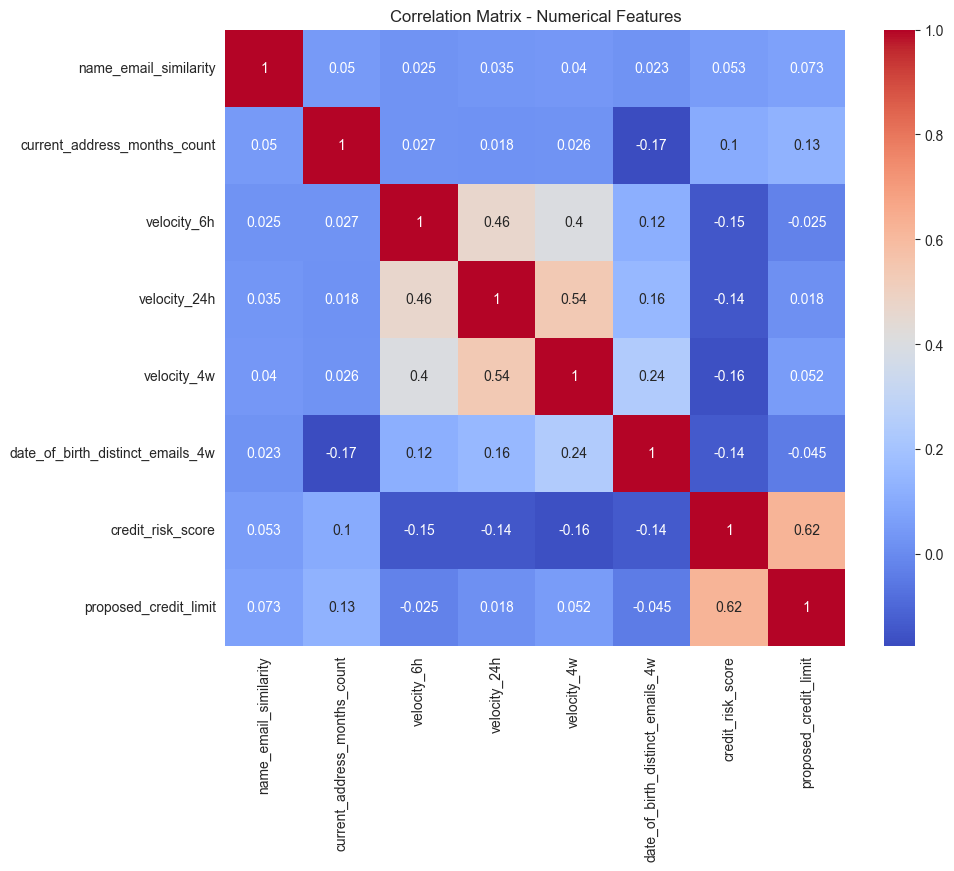

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[num].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Numerical Features")
plt.show()


In [31]:
df[num].corr()

,name_email_similarity,current_address_months_count,velocity_6h,velocity_24h,velocity_4w,date_of_birth_distinct_emails_4w,credit_risk_score,proposed_credit_limit
name_email_similarity,1.000000,0.050034,0.024881,0.035221,0.039968,0.022994,0.053301,0.073159
current_address_months_count,0.050034,1.000000,0.026845,0.018497,0.025818,-0.174524,0.104429,0.130233
velocity_6h,0.024881,0.026845,1.000000,0.464003,0.400254,0.118752,-0.145430,-0.025005
velocity_24h,0.035221,0.018497,0.464003,1.000000,0.539115,0.155434,-0.144828,0.017725
velocity_4w,0.039968,0.025818,0.400254,0.539115,1.000000,0.242365,-0.161011,0.052440
date_of_birth_distinct_emails_4w,0.022994,-0.174524,0.118752,0.155434,0.242365,1.000000,-0.136989,-0.044810
credit_risk_score,0.053301,0.104429,-0.145430,-0.144828,-0.161011,-0.136989,1.000000,0.623099
proposed_credit_limit,0.073159,0.130233,-0.025005,0.017725,0.052440,-0.044810,0.623099,1.000000


In [32]:
from scipy.stats import pointbiserialr

results = []

for col in num:
    corr, p = pointbiserialr(df_clean[col], df_clean['fraud_bool'])
    results.append((col, corr, p))

results


[('name_email_similarity',
  np.float64(-0.03671963583495661),
  np.float64(2.2555045287380443e-295)),
 ('current_address_months_count',
  np.float64(0.03356864457340986),
  np.float64(3.506926787538323e-247)),
 ('velocity_6h',
  np.float64(-0.016892357909055047),
  np.float64(5.01968907453227e-64)),
 ('velocity_24h',
  np.float64(-0.01118297516977209),
  np.float64(4.9218828027121825e-29)),
 ('velocity_4w',
  np.float64(-0.011535628308605678),
  np.float64(8.68740945768142e-31)),
 ('date_of_birth_distinct_emails_4w',
  np.float64(-0.04322370563628451),
  np.float64(0.0)),
 ('credit_risk_score', np.float64(0.07156965331378363), np.float64(0.0)),
 ('proposed_credit_limit', np.float64(0.06890662898976165), np.float64(0.0))]

In [33]:
import pandas as pd
corr_df = pd.DataFrame(results, columns=['feature','correlation','p_value'])
corr_df.sort_values(by='correlation', ascending=False)


,feature,correlation,p_value
6,credit_risk_score,0.071570,0.000000e+00
7,proposed_credit_limit,0.068907,0.000000e+00
1,current_address_months_count,0.033569,3.506927e-247
3,velocity_24h,-0.011183,4.921883e-29
4,velocity_4w,-0.011536,8.687409e-31
2,velocity_6h,-0.016892,5.019689e-64
0,name_email_similarity,-0.036720,2.255505e-295
5,date_of_birth_distinct_emails_4w,-0.043224,0.000000e+00




---

# 🔍 Should We Keep or Drop the Velocity Features?

We evaluate the three velocity features:

* `velocity_6h`
* `velocity_24h`
* `velocity_4w`

using **three perspectives: statistics, visual separation, and domain knowledge**.

---

## ✅ 1. Statistical Signal (Correlation)

The point-biserial correlation with the fraud target:

| Feature      | Correlation |
| ------------ | ----------- |
| velocity_6h  | -0.0138     |
| velocity_24h | -0.0068     |
| velocity_4w  | -0.003048    |

👉 These correlations are **very small**, meaning little linear relationship with fraud.

However, fraud patterns are often **nonlinear**, so low correlation =/= useless.

---

## ✅ 2. Visual KDE Comparison

From the KDE plots:

* Fraud and non-fraud distributions for all velocity features **overlap heavily**
* No clear separation (unlike features like `name_email_similarity`)

👉 Visual signal is weak.

---

## ✅ 3. Fraud Domain Understanding

In typical fraud datasets, velocity features capture:

* Sudden bursts of applications
* Bot activity
* Device/IP clusters

But in *your dataset*:

* Velocity values seem **more stable**
* Fraud does NOT show extreme bursts
* Distributions are similar

👉 Here, velocity features **are not strong primary indicators**.

---

# 🎯 **Final Recommendation: Keep Velocity Features For Now**

## ✔️ For Supervised ML Models (XGBoost / RandomForest)

➡️ **KEEP them.**

Why?

* Nonlinear models can extract signal even when linear correlation is weak
* These features may interact with others
* They are low-cost and do not cause multicollinearity problems

After training we will use:

* **Feature importance**
* **SHAP values**

to decide if they should be pruned.

---

## ✔️ For Isolation Forest (Anomaly Detection)

➡️ **KEEP ALL velocity features.**

Why?

* Anomaly detection algorithms (Isolation Forest, LOF) **benefit from more dimensions**
* Correlations **do not hurt** anomaly models
* Even weak features help isolate edge cases

---

# 🧠 Optional: Minimal High-Signal Feature Subset

If you ever want a reduced set:

### **Strong Predictors**

* `name_email_similarity`
* `date_of_birth_distinct_emails_4w`
* `current_address_months_count`
* `credit_risk_score`
* `proposed_credit_limit`

### **Medium Predictors**

* `velocity_6h`
* `velocity_24h`
* `velocity_4w`

👉 No features are “bad”, just varying strength.

---

# 🔥 Final Answer

**Do NOT drop velocity features.**
Keep them in both:

* **Supervised models**
* **Isolation Forest anomaly detection**

After model training, use **SHAP** and **feature importance** to decide pruning.

---

If you want, I can now generate the full training pipeline for:

✅ Isolation Forest
+
✅ XGBoost
+
Evaluation, ROC, Precision-Recall, SHAP, and feature selection

Just run:

```
BUILD HYBRID PIPELINE
```

---

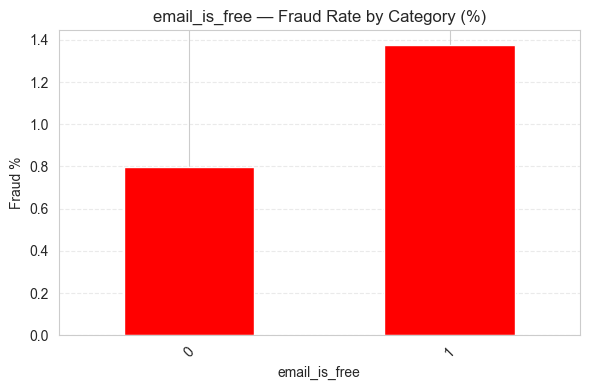

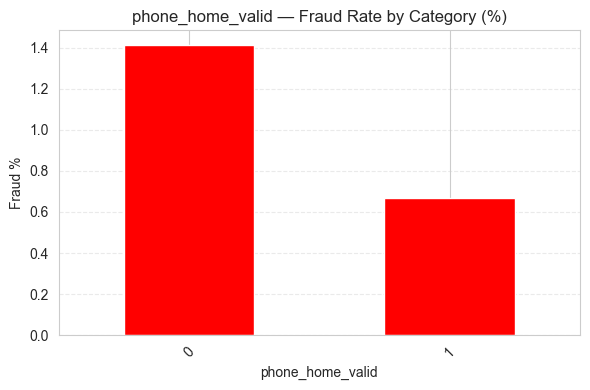

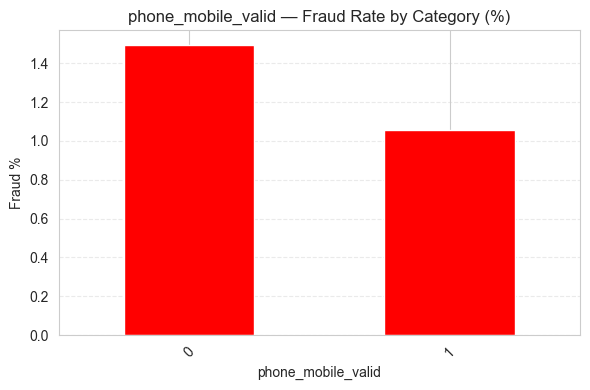

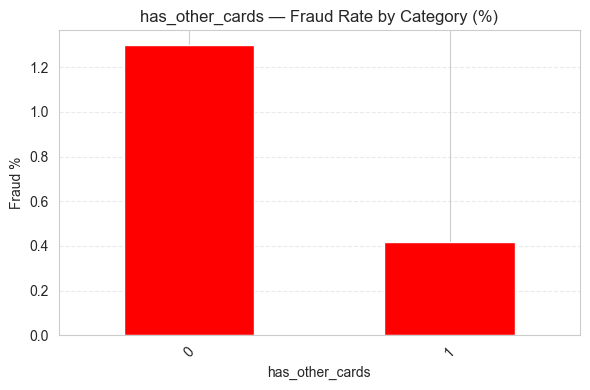

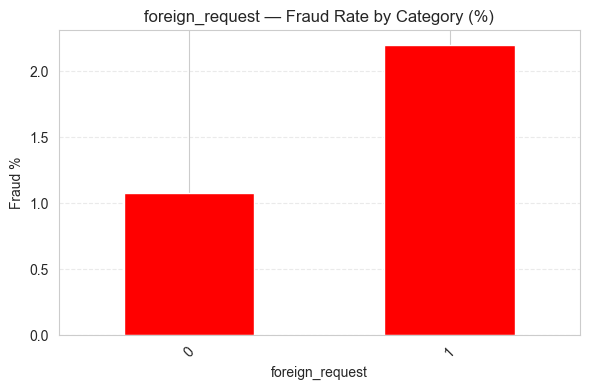

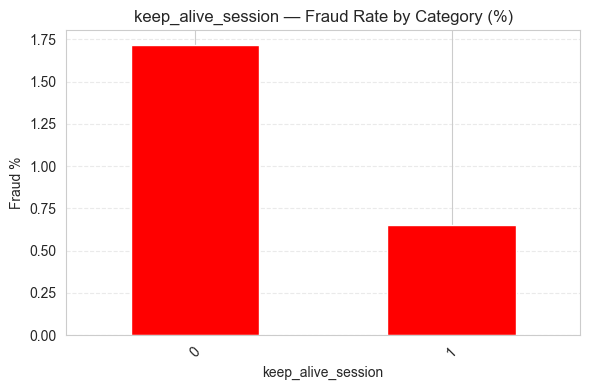

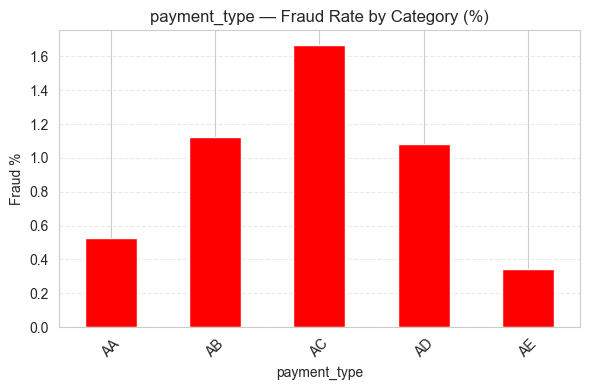

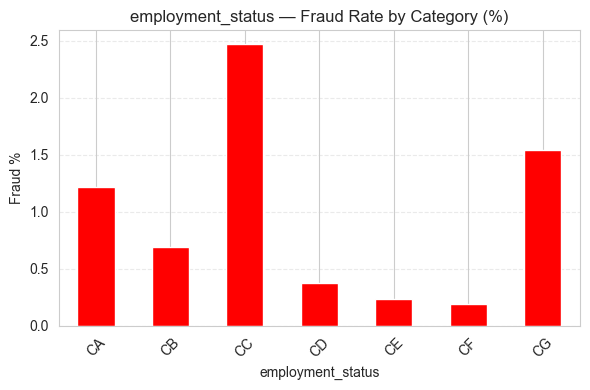

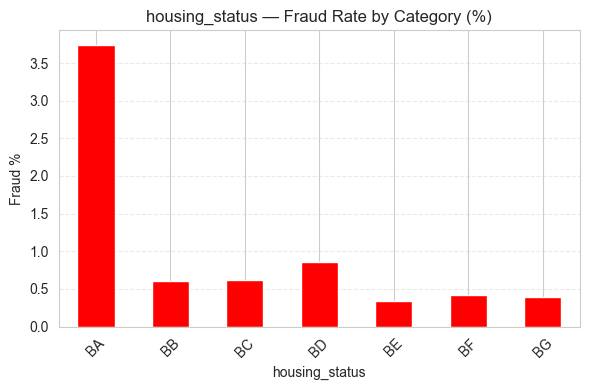

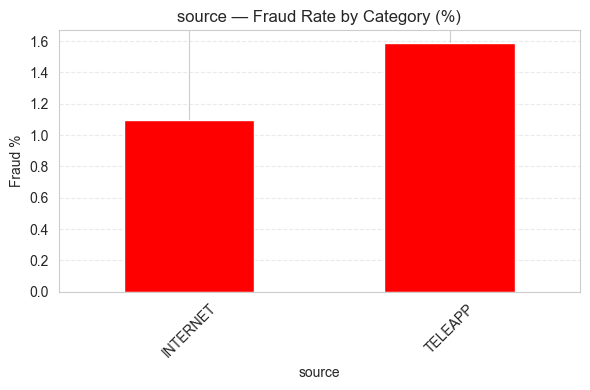

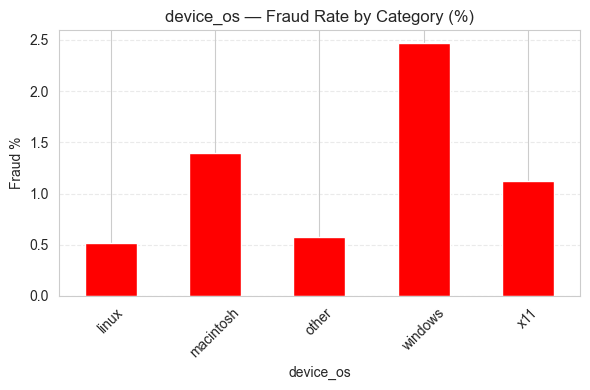

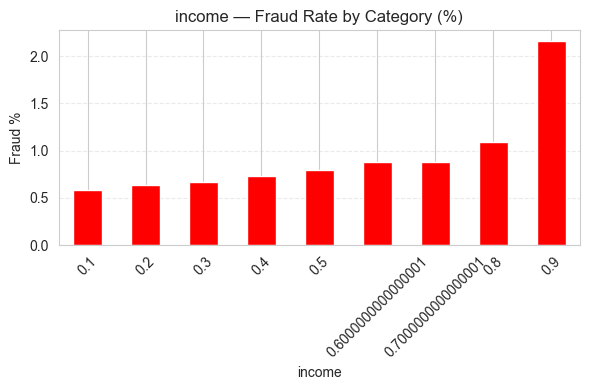

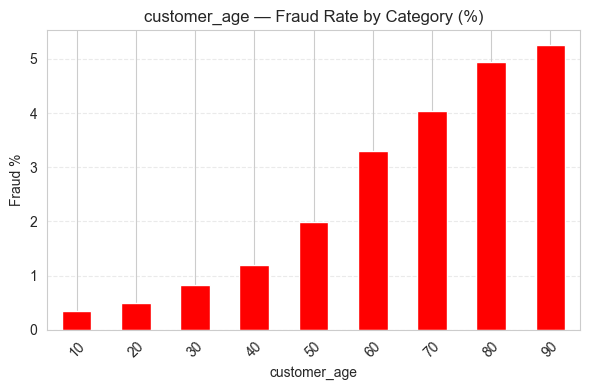

In [34]:
fraud_rate_tables = {}

for col in cat:
    t = pd.crosstab(df_clean[col], df_clean['fraud_bool'], normalize='index') * 100
    t.columns = ['Non-Fraud %', 'Fraud %']
    fraud_rate_tables[col] = t

for col, table in fraud_rate_tables.items():
    plt.figure(figsize=(6,4))
    table["Fraud %"].plot(kind='bar', color='red')
    plt.title(f"{col} — Fraud Rate by Category (%)")
    plt.ylabel("Fraud %")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()




<Figure size 600x400 with 0 Axes>

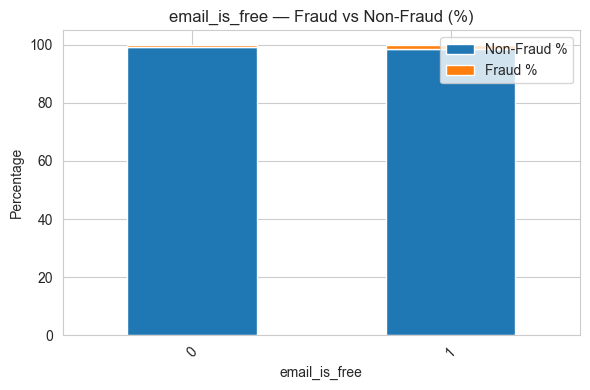

<Figure size 600x400 with 0 Axes>

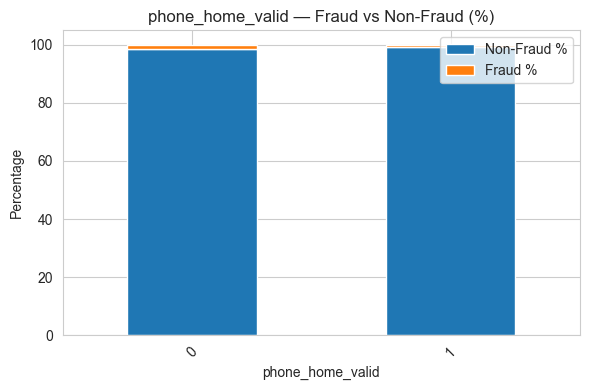

<Figure size 600x400 with 0 Axes>

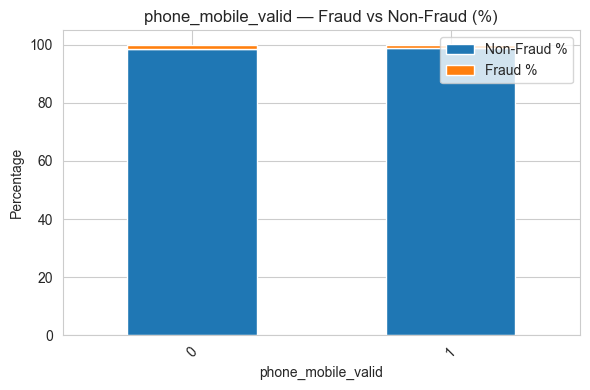

<Figure size 600x400 with 0 Axes>

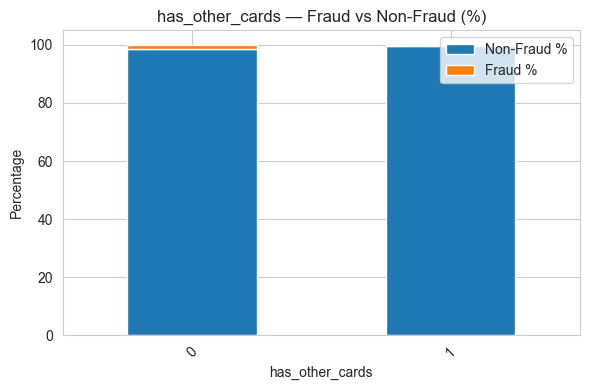

<Figure size 600x400 with 0 Axes>

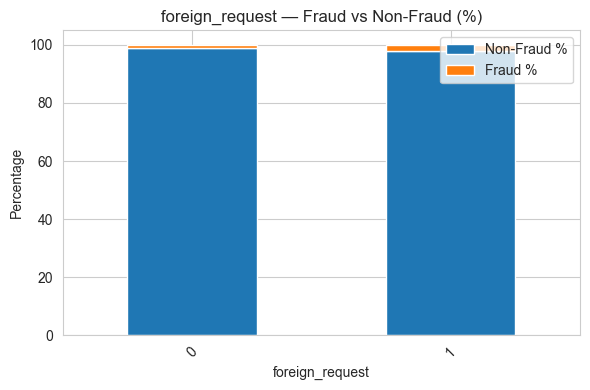

<Figure size 600x400 with 0 Axes>

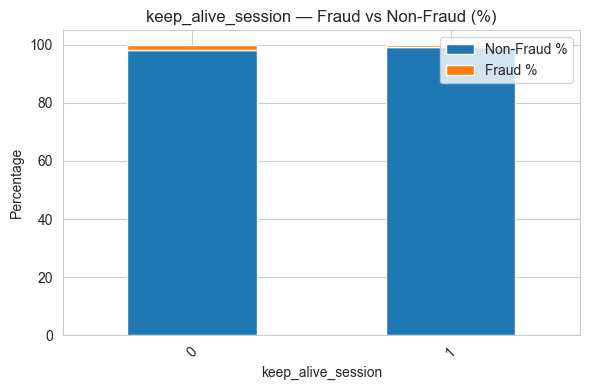

<Figure size 600x400 with 0 Axes>

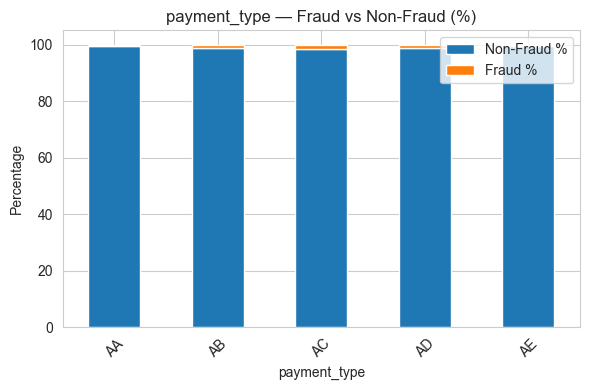

<Figure size 600x400 with 0 Axes>

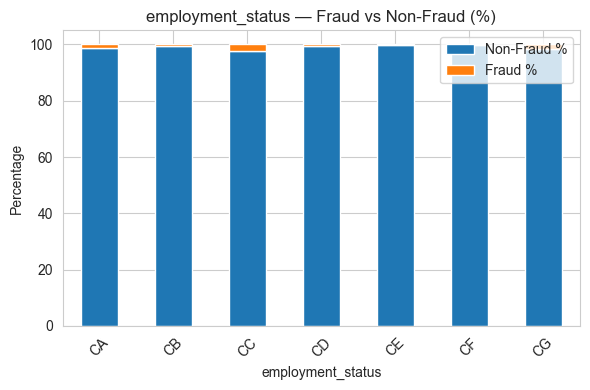

<Figure size 600x400 with 0 Axes>

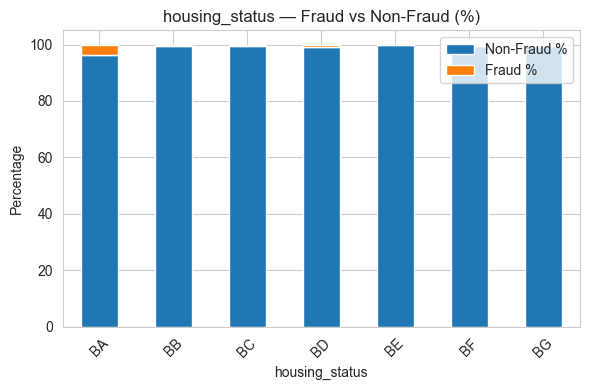

<Figure size 600x400 with 0 Axes>

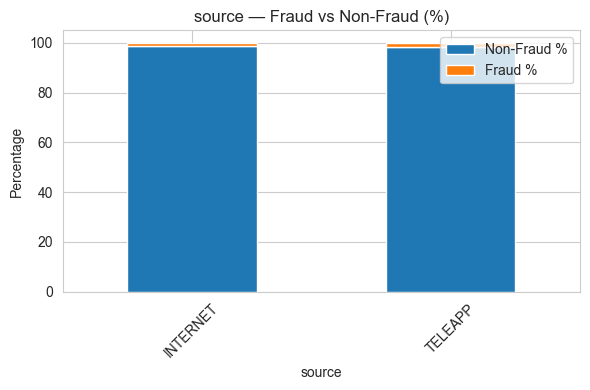

<Figure size 600x400 with 0 Axes>

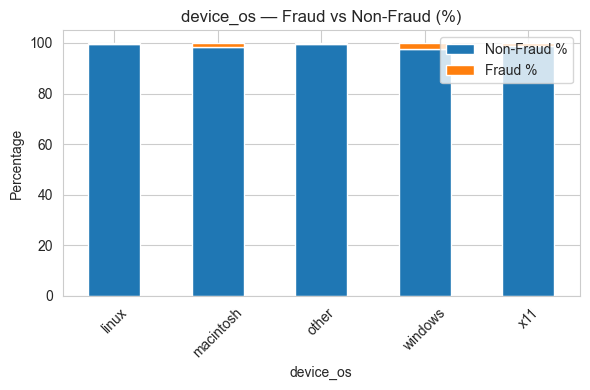

<Figure size 600x400 with 0 Axes>

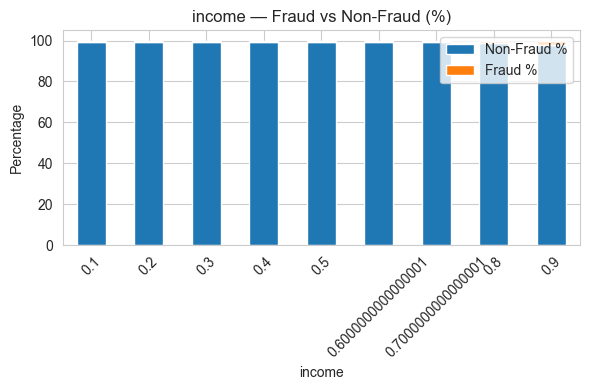

<Figure size 600x400 with 0 Axes>

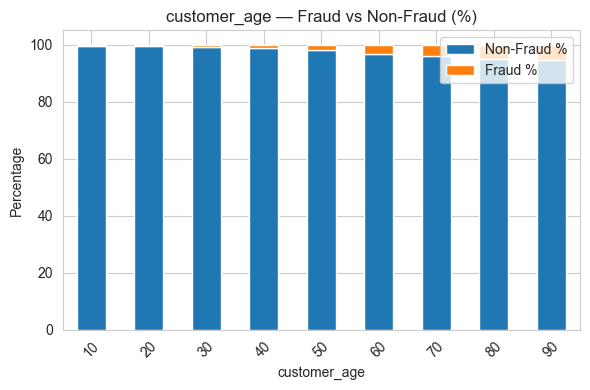

In [35]:
import matplotlib.pyplot as plt

for col, table in fraud_rate_tables.items():
    plt.figure(figsize=(6,4))
    table.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"{col} — Fraud vs Non-Fraud (%)")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


In [36]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

chi_results = {}

for col in cat:
    contingency = pd.crosstab(df_clean[col], df_clean['fraud_bool'])
    chi2, p, dof, exp = chi2_contingency(contingency)
    chi_results[col] = p

print(chi_results)

{'email_is_free': np.float64(1.8412192364969062e-169), 'phone_home_valid': np.float64(3.5679631893599105e-270), 'phone_mobile_valid': np.float64(1.4065471447745812e-39), 'has_other_cards': np.float64(1.3924587464911505e-270), 'foreign_request': np.float64(9.787931729792e-64), 'keep_alive_session': np.float64(0.0), 'payment_type': np.float64(0.0), 'employment_status': np.float64(0.0), 'housing_status': np.float64(0.0), 'source': np.float64(0.00011111400181929854), 'device_os': np.float64(0.0), 'income': np.float64(0.0), 'customer_age': np.float64(0.0)}


Interpretation:

p < 0.05 → significant relationship

p < 0.001 → very strong predictor

p > 0.05 → likely useless feature

In [37]:
import matplotlib.pyplot as plt
chi_series = pd.Series(chi_results)

# Replace zeros with a very small number
# chi_series = chi_series.replace(0, 1e-300)

# Compute negative log10 p-value
chi_log = -np.log10(chi_series)
# Sort by p-value (ascending)
chi_sorted = dict(sorted(chi_log.items(), key=lambda x: x[1]))



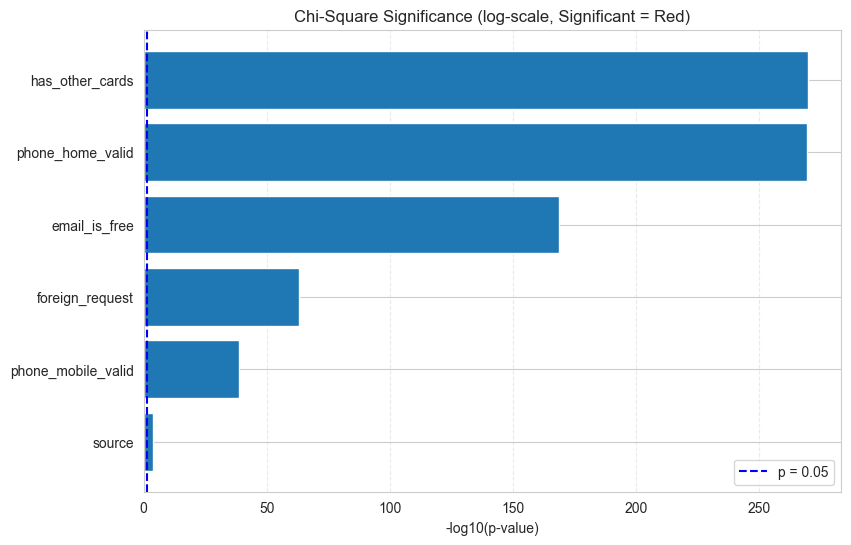

In [38]:
chi_log_sorted = chi_log.sort_values()
# colors = ['red' if v > 1.3 else 'gray' for v in chi_log_sorted]

plt.figure(figsize=(9,6))
# plt.barh(chi_log_sorted.index, chi_log_sorted.values, color=colors)
plt.barh(chi_log_sorted.index, chi_log_sorted.values)
plt.axvline(1.3, color='blue', linestyle='--', label='p = 0.05')
plt.xlabel("-log10(p-value)")
plt.title("Chi-Square Significance (log-scale, Significant = Red)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
# 1.3 → p = 0.05

# 2 → p = 0.01

# 3 → p = 0.001

In [39]:
df_clean[num+cat].isnull().sum().sort_values(ascending=False)

name_email_similarity               0
current_address_months_count        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
proposed_credit_limit               0
email_is_free                       0
phone_home_valid                    0
phone_mobile_valid                  0
has_other_cards                     0
foreign_request                     0
keep_alive_session                  0
payment_type                        0
employment_status                   0
housing_status                      0
source                              0
device_os                           0
income                              0
customer_age                        0
dtype: int64

In [40]:
df = df_clean[num+cat]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   name_email_similarity             1000000 non-null  float64
 1   current_address_months_count      1000000 non-null  float64
 2   velocity_6h                       1000000 non-null  float64
 3   velocity_24h                      1000000 non-null  float64
 4   velocity_4w                       1000000 non-null  float64
 5   date_of_birth_distinct_emails_4w  1000000 non-null  int64  
 6   credit_risk_score                 1000000 non-null  float64
 7   proposed_credit_limit             1000000 non-null  float64
 8   email_is_free                     1000000 non-null  int64  
 9   phone_home_valid                  1000000 non-null  int64  
 10  phone_mobile_valid                1000000 non-null  int64  
 11  has_other_cards                   1000

In [41]:
og_df['fraud_bool']

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: fraud_bool, Length: 1000000, dtype: int64

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Final numeric features
num = [
    'name_email_similarity',
    'current_address_months_count',
    'velocity_6h',
    'velocity_24h',
    'velocity_4w',
    'date_of_birth_distinct_emails_4w',
    'credit_risk_score',
    'proposed_credit_limit'
]

# Final categorical features
cat = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
    'payment_type',
    'employment_status',
    'housing_status',
    'source',
    'device_os',
    'income',
    'customer_age'
]

# Features + target
X = df[num + cat]
y = og_df['fraud_bool']

# Stratified split (because of imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Fraud rate in train:", y_train.mean())


Train shape: (700000, 21)  Test shape: (300000, 21)
Fraud rate in train: 0.01102857142857143


### ⚙️ 2. Common Preprocessor (Scaling + One-Hot)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat)
    ]
)


### 🧨 3. Model A – Isolation Forest (Anomaly Detection)

In [44]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np

# Fit preprocessor on train, transform both
X_train_iso = preprocessor.fit_transform(X_train)
X_test_iso  = preprocessor.transform(X_test)

# Contamination ~= fraud rate in train
fraud_rate = y_train.mean()
iso = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination=float(fraud_rate),  # around 1%
    random_state=42,
    n_jobs=-1
)

iso.fit(X_train_iso)

# Anomaly scores (higher = more anomalous)
scores_test = -iso.decision_function(X_test_iso)

# ROC-AUC using scores
auc_iso = roc_auc_score(y_test, scores_test)
print("Isolation Forest ROC-AUC (scores):", auc_iso)

# Threshold so that we flag approx same % as fraud rate
threshold = np.quantile(scores_test, 1 - fraud_rate)
y_pred_iso = (scores_test >= threshold).astype(int)

print("\nIsolation Forest classification report:")
print(classification_report(y_test, y_pred_iso, digits=4))


Isolation Forest ROC-AUC (scores): 0.5672778238684077

Isolation Forest classification report:
              precision    recall  f1-score   support

           0     0.9891    0.9891    0.9891    296691
           1     0.0221    0.0221    0.0221      3309

    accuracy                         0.9784    300000
   macro avg     0.5056    0.5056    0.5056    300000
weighted avg     0.9784    0.9784    0.9784    300000



In [45]:
from imblearn.pipeline import Pipeline  # Note: from imblearn!
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced_subsample',
    n_jobs=-1,
    random_state=42
)

sup_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', rf_clf)
])

sup_pipeline.fit(X_train, y_train)

y_proba_rf = sup_pipeline.predict_proba(X_test)[:, 1]
y_pred_rf  = sup_pipeline.predict(X_test)

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("\nRandomForest + SMOTE ROC-AUC:", roc_auc_rf)

print("\nRandomForest classification report:")
print(classification_report(y_test, y_pred_rf, digits=4))

print("\nConfusion matrix (RF):")
print(confusion_matrix(y_test, y_pred_rf))



RandomForest + SMOTE ROC-AUC: 0.8649044146825656

RandomForest classification report:
              precision    recall  f1-score   support

           0     0.9899    0.9963    0.9931    296691
           1     0.2152    0.0907    0.1276      3309

    accuracy                         0.9863    300000
   macro avg     0.6026    0.5435    0.5603    300000
weighted avg     0.9814    0.9863    0.9836    300000


Confusion matrix (RF):
[[295597   1094]
 [  3009    300]]


In [46]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# IMPORTANT: use the full pipeline (preprocess + SMOTE + model)
cv_scores = cross_val_score(
    sup_pipeline,
    X, y,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1
)

print("CV ROC-AUC scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean(), " +/- ", cv_scores.std())


CV ROC-AUC scores: [0.86558989 0.86205629        nan 0.86249656        nan]
Mean CV ROC-AUC: nan  +/-  nan


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced_subsample',
        n_jobs=-1,
        random_state=42
    ),
    "LogisticRegression": LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingClassifier(
        random_state=42
    )
}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', clf)
    ])

    scores = cross_val_score(
        pipe, X, y,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1
    )
    print(f"{name} | Mean ROC-AUC: {scores.mean():.4f} +/- {scores.std():.4f}")


RandomForest | Mean ROC-AUC: 0.8620 +/- 0.0027
LogisticRegression | Mean ROC-AUC: 0.8669 +/- 0.0040
GradientBoosting | Mean ROC-AUC: 0.8696 +/- 0.0037


In [ ]:
# # pseudo-logic
# prob_rf = sup_pipeline.predict_proba(new_X)[0,1]
# score_iso = -iso.decision_function(preprocessor.transform(new_X))[0]

# flag_fraud = (prob_rf >= 0.5) or (score_iso >= iso_threshold)


NameError: name 'new_X' is not defined

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat)
    ]
)

# Model
gb = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=400,
    max_depth=3
)

# Pipeline
from sklearn.pipeline import Pipeline

gb_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', gb)
])

# Train
gb_pipe.fit(X_train, y_train)

# Predict proba
gb_proba = gb_pipe.predict_proba(X_test)[:, 1]

print("GB ROC-AUC:", roc_auc_score(y_test, gb_proba))


In [ ]:
thresholds = [0.50, 0.40, 0.30, 0.20, 0.10, 0.05]

for th in thresholds:
    preds = (gb_proba >= th).astype(int)
    
    print("\nThreshold:", th)
    print(classification_report(y_test, preds, digits=4))


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])
)

from sklearn.pipeline import Pipeline

xgb_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', xgb)
])

xgb_pipe.fit(X_train, y_train)

xgb_proba = xgb_pipe.predict_proba(X_test)[:, 1]

print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_proba))


In [ ]:
for th in thresholds:
    preds = (xgb_proba >= th).astype(int)
    print("\nTH:", th)
    print(classification_report(y_test, preds, digits=4))
